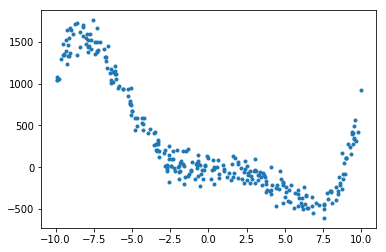

(300, 1)


In [203]:
# Machine Learning HW2 Poly Regression

import matplotlib.pyplot as plt
import numpy as np

# Step 1
# Parse the file and return 2 numpy arrays
def load_data_set(filename):
    arr = np.loadtxt(filename)
    x, y = np.split(arr, [-1], axis=1)
#     print(x)
#     print(y)
    plt.plot(x, y, '.')
    plt.show()
    return x, y

x, y = load_data_set("dataPoly.txt")
print(x.shape)

In [270]:
# Step 2: 
# Given a n by 1 dimensional array return an n by num_dimension array
# consisting of [1, x, x^2, ...] in each row
# x: input array with size n
# degree: degree number, an int
# result: polynomial basis based reformulation of x 
def increase_poly_order(x, degree):
    result = np.array([list(np.power(x.flatten(), i))
                       for i in range(degree+1)]).T
    # normalize
    result = result / result.max(axis=0)
    return result
# x = increase_poly_order(x, 2)
print(x.shape)

(300, 1)


In [205]:
def train_test_split(x, y, train_proportion):
    # your code
    num_train = int(x.shape[0] * train_proportion)
    print(num_train)
    x_train, x_test = x[:num_train, :], x[num_train:, :]
    y_train, y_test = y[:num_train, :], y[num_train:, :]
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.8)
print(x_train.shape)
print(x_test.shape)


240
(240, 1)
(60, 1)


In [298]:
def solve_regression(x, y, num_iterations=100, learning_rate=0.002):
    # your GD code from HW1 or better version
    num_features = x.shape[1]
    thetas = []
    theta = np.array([[0.0] for i in range(num_features)])
    for _ in range(num_iterations):
        gradient_sum = np.array([[0.0] for i in range(num_features)])
        for row, label in zip(x, y):
            gradient_sum = gradient_sum - learning_rate * \
                row[:, np.newaxis] * (np.dot(row, theta) - label)
        theta = theta + gradient_sum
        thetas.append(theta)
    return theta, thetas
theta, thetas = solve_regression(x_train, y_train)
print(theta)
# print(thetas)

[[5.20170704e+117]]


In [207]:
def predict(x, theta):
    # your code
    y_predict = x.dot(theta)
    return y_predict

In [210]:
def get_loss(y, y_predict):
    diff = y - y_predict
    loss = np.inner(diff.flatten(), diff.flatten()) / len(y)
    return loss
theta, thetas = solve_regression(x_train, y_train, 200, 0.000004)
y_predict = predict(x_test, theta)
loss = get_loss(y_test, y_predict)
print(loss)

237339.5023310314


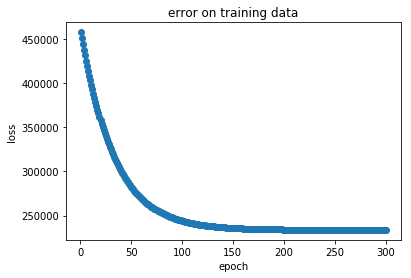

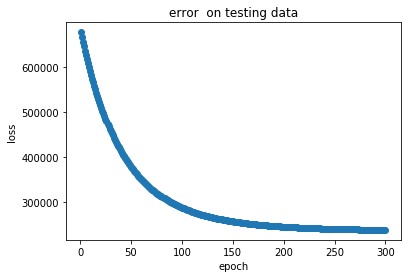

In [230]:
def plot_epoch_losses(x_train, x_test, y_train, y_test, best_thetas, title):
    # your code 
    epochs = []
    losses = []
    epoch_num = 1
    for theta in best_thetas:
        losses.append(get_loss(y_train, predict(x_train, theta)))
        epochs.append(epoch_num)
        epoch_num += 1
    plt.scatter(epochs, losses)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title + "on training data")
    plt.show()

    epochs = []
    losses = []
    epoch_num = 1
    for theta in best_thetas:
        losses.append(get_loss(y_test, predict(x_test, theta)))
        epochs.append(epoch_num)
        epoch_num += 1
    plt.scatter(epochs, losses)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title + " on testing data")
    plt.show()
    
theta, thetas = solve_regression(x_train, y_train, 300, 0.000002)
plot_epoch_losses(x_train, x_test, y_train, y_test, thetas, "error ")

In [293]:
def get_loss_per_poly_order(x, y, degrees):
    # your code
    training_losses = []
    validation_losses = []
    for degree in degrees:
        augmented_x = increase_poly_order(x, degree)
        x_train, x_test, y_train, y_test = train_test_split(augmented_x, y, 0.6)
        x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, 0.5)
        theta, thetas = solve_regression(x_train, y_train, 100, 0.002)
#         print(thetas)
#         plot_epoch_losses(x_train, x_validation, y_train, y_validation, thetas, "error with degree={} ".format(degree))
        training_losses.append(get_loss(y_train, predict(x_train, theta)))
        validation_losses.append(get_loss(y_validation, predict(x_validation, theta)))
    return training_losses, validation_losses
# get_loss_per_poly_order(x, y, [i for i in range(10)])

In [296]:
def select_hyperparameter(degrees, x_train, x_test, y_train, y_test):
    # Part 1: hyperparameter tuning:
    # Given a set of training examples, split it into train-validation splits
    # do hyperparameter tune
    # come up with best model, then report error for best model
    training_losses, validation_losses = get_loss_per_poly_order(
        x_train, y_train, degrees)
    print(training_losses)
    plt.plot(degrees, training_losses, label="training_loss")
    plt.plot(degrees, validation_losses, label="validation_loss")
    plt.yscale("log")
    plt.legend(loc='best')
    plt.title("poly order vs validation_loss")
    plt.show()

    # Part 2:  testing with the best learned theta
    # Once the best hyperparameter has been chosen
    # Train the model using that hyperparameter with all samples in the training
    # Then use the test data to estimate how well this model generalizes.
    best_degree = 9  # fill in using best degree from part 2
    x_train = increase_poly_order(x_train, best_degree)
    best_theta, best_thetas = solve_regression(x_train, y_train)
    print('ppppppppp {}'.format(best_theta))
    best_fit_plot(best_theta, best_degree)
    print(best_theta)
    x_test = increase_poly_order(x_test, best_degree)
    test_loss = get_loss(y_test, predict(x_test, best_theta))
    train_loss = get_loss(y_train, predict(x_train, best_theta))

    # Part 3: visual analysis to check GD optimization traits of the best theta
    plot_epoch_losses(x_train, x_test, y_train, y_test, best_thetas,
                      "best learned theta - train, test losses vs. GD epoch ")
    return best_degree, best_theta, train_loss, test_loss

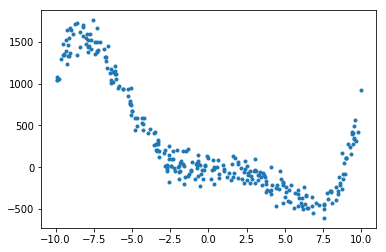

240
144
48
144
48
144
48
144
48
144
48
144
48
144
48
144
48
144
48
144
48
[398044.7708962984, 146943.75271348323, 52009.753567202955, 52253.40274234422, 55049.037526877335, 45622.54928691541, 47197.39553273988, 38476.102834668745, 38698.08253304303, 32719.775071768698]


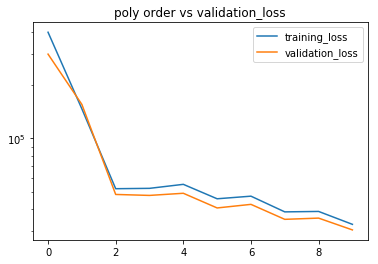

ppppppppp [[   8.11768401]
 [-970.49815039]
 [ 638.95467787]
 [-382.32370869]
 [ 302.22986811]
 [  88.91048113]
 [  96.59979661]
 [ 344.00139005]
 [ -21.68643834]
 [ 481.67988877]]


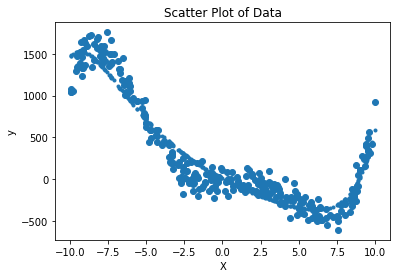

[[   8.11768401]
 [-970.49815039]
 [ 638.95467787]
 [-382.32370869]
 [ 302.22986811]
 [  88.91048113]
 [  96.59979661]
 [ 344.00139005]
 [ -21.68643834]
 [ 481.67988877]]


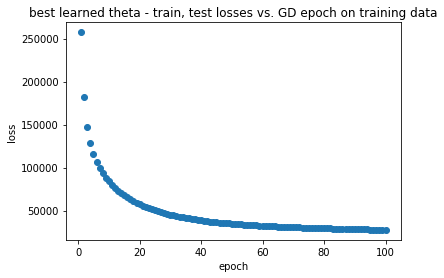

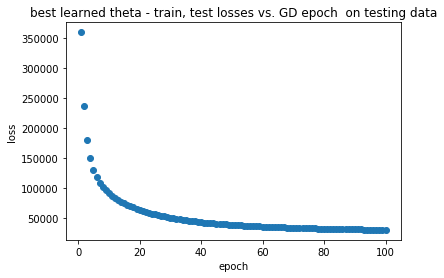

In [299]:
# select the best polynomial through train-validation-test formulation
x, y = load_data_set("dataPoly.txt")
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.8)
degrees = [i for i in range(10)]
best_degree, best_theta, train_loss, test_loss = select_hyperparameter(
    degrees, x_train, x_test, y_train, y_test)

240
[[  2.99985526]
 [-16.73399368]]


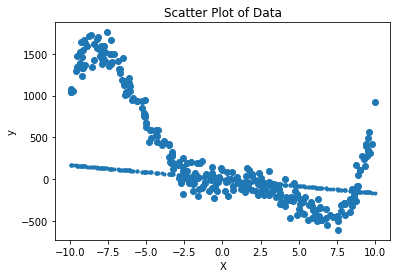

In [192]:
def best_fit_plot(theta, degree):
    # your code
    augmented_x = increase_poly_order(x, degree)
    y_predict = predict(augmented_x, theta)
    plt.scatter(x[:, 0], y)
    plt.plot(x[:, 0], y_predict, ".")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Scatter Plot of Data")
    plt.show()
degree =3
augmented_x = increase_poly_order(x, degree)
x_train, x_test, y_train, y_test = train_test_split(augmented_x, y, 0.8)
theta, thetas = solve_regression(x_train, y_train)
print(theta)
best_fit_plot(theta, degree)

In [281]:
x = np.array([[1000,  10,   0.5],
              [ 765,   5,  0.35],
              [ 800,   7,  0.09]])
x.max(axis=0)
x/x.max(axis=0)

array([[1.   , 1.   , 1.   ],
       [0.765, 0.5  , 0.7  ],
       [0.8  , 0.7  , 0.18 ]])